# Importing the Necessary Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# Importing the Breast Cancer Dataset

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer = fetch_ucirepo(id=14)

# data (as pandas dataframes)
X = breast_cancer.data.features
y = breast_cancer.data.targets

# metadata
print(breast_cancer.metadata)

# variable information
print(breast_cancer.variables)


{'uci_id': 14, 'name': 'Breast Cancer', 'repository_url': 'https://archive.ics.uci.edu/dataset/14/breast+cancer', 'data_url': 'https://archive.ics.uci.edu/static/public/14/data.csv', 'abstract': 'This breast cancer domain was obtained from the University Medical Centre, Institute of Oncology, Ljubljana, Yugoslavia. This is one of three domains provided by the Oncology Institute that has repeatedly appeared in the machine learning literature. (See also lymphography and primary-tumor.)', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 286, 'num_features': 9, 'feature_types': ['Categorical'], 'demographics': ['Age'], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Mar 07 2024', 'dataset_doi': '10.24432/C51P4M', 'creators': ['Matjaz Zwitter', 'Milan Soklic'], 'intro_paper': None, 'additional_info': {'summary': 'Thi

In [ ]:
df = pd.DataFrame(X)
df['target'] = y
df.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,target
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no,no-recurrence-events
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no,no-recurrence-events
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no,no-recurrence-events
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no,no-recurrence-events


In [ ]:
#Finding any null variables if they exist

df[df.isnull().any(axis = 1)]

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,target
145,40-49,premeno,25-29,0-2,NaN,2,left,right_low,yes,no-recurrence-events
163,60-69,ge40,25-29,5-Mar,NaN,1,right,left_up,yes,no-recurrence-events
164,60-69,ge40,25-29,5-Mar,NaN,1,right,left_low,yes,no-recurrence-events
183,50-59,ge40,30-34,11-Sep,NaN,3,left,left_up,yes,no-recurrence-events
184,50-59,ge40,30-34,11-Sep,NaN,3,left,left_low,yes,no-recurrence-events
206,50-59,ge40,30-34,0-2,no,3,left,NaN,no,recurrence-events
233,70-79,ge40,15-19,11-Sep,NaN,1,left,left_low,yes,recurrence-events
263,50-59,lt40,20-24,0-2,NaN,1,left,left_up,no,recurrence-events
264,50-59,lt40,20-24,0-2,NaN,1,left,left_low,no,recurrence-events


# Data Cleaning and Preprocessing

In [ ]:
#Removing the null values

clean_df = df.dropna().copy()

clean_df.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,target
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no,no-recurrence-events
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no,no-recurrence-events
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no,no-recurrence-events
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no,no-recurrence-events


In [ ]:
#Checking whether null value exists

clean_df[clean_df.isnull().any(axis = 1)]

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,target


In [ ]:
#Binarize node-caps & irradiat& Class

clean_df['node-caps']= (clean_df['node-caps']=='yes').astype(int)
clean_df['irradiat']= (clean_df['irradiat']=='yes').astype(int)
clean_df['target']= (clean_df['target']=='recurrence-events').astype(int)

clean_df.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,target
0,30-39,premeno,30-34,0-2,0,3,left,left_low,0,0
1,40-49,premeno,20-24,0-2,0,2,right,right_up,0,0
2,40-49,premeno,20-24,0-2,0,2,left,left_low,0,0
3,60-69,ge40,15-19,0-2,0,2,right,left_up,0,0
4,40-49,premeno,0-4,0-2,0,2,right,right_low,0,0


In [ ]:
#Convert *Breast Quadrant* string descriptive Information into number.

quad = {'left_up':1, 'left_low': 2, 'right_up':3, 'right_low':4, 'central':5}
clean_df = clean_df.replace({'breast-quad': quad})
clean_df['breast-quad'] = clean_df['breast-quad'].apply(pd.to_numeric, downcast='float', errors='coerce')

clean_df.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,target
0,30-39,premeno,30-34,0-2,0,3,left,2,0,0
1,40-49,premeno,20-24,0-2,0,2,right,3,0,0
2,40-49,premeno,20-24,0-2,0,2,left,2,0,0
3,60-69,ge40,15-19,0-2,0,2,right,1,0,0
4,40-49,premeno,0-4,0-2,0,2,right,4,0,0


In [ ]:
#Convert *Breast* string descriptive Information into number (Left = 1, Right = 2)

breast = {'left':1, 'right':2}
clean_df = clean_df.replace({'breast': breast})

clean_df.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,target
0,30-39,premeno,30-34,0-2,0,3,1,2,0,0
1,40-49,premeno,20-24,0-2,0,2,2,3,0,0
2,40-49,premeno,20-24,0-2,0,2,1,2,0,0
3,60-69,ge40,15-19,0-2,0,2,2,1,0,0
4,40-49,premeno,0-4,0-2,0,2,2,4,0,0


In [ ]:
#Convert *menopause* string descriptive Information into number.

menopause = {'premeno':1, 'ge40': 2, 'lt40':3}
clean_df = clean_df.replace({'menopause': menopause})

clean_df.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,target
0,30-39,1,30-34,0-2,0,3,1,2,0,0
1,40-49,1,20-24,0-2,0,2,2,3,0,0
2,40-49,1,20-24,0-2,0,2,1,2,0,0
3,60-69,2,15-19,0-2,0,2,2,1,0,0
4,40-49,1,0-4,0-2,0,2,2,4,0,0


In [ ]:
#Convert 'inv-nodes' to the median of its average range.

nodes = {'0-2':1, '3-5':4,'6-8':7,'9-11':10, '12-14':13,'15-17':16,'18-20':19,'21-23':22,'24-26':25,'27-29':28,'30-32':31,'33-35':34,
        '36-38':37,'39':39}
clean_df = clean_df.replace({'inv-nodes': nodes})
clean_df.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,target
0,30-39,1,30-34,1,0,3,1,2,0,0
1,40-49,1,20-24,1,0,2,2,3,0,0
2,40-49,1,20-24,1,0,2,1,2,0,0
3,60-69,2,15-19,1,0,2,2,1,0,0
4,40-49,1,0-4,1,0,2,2,4,0,0


In [ ]:
#Convert age to the numerical average of its average range.

age = {'20-29':24.5, '30-39':34.5,'40-49':44.5,'50-59':54.5, '60-69':64.5,'70-79':74.5,'80-89':84.5,'90-99':94.5}
clean_df = clean_df.replace({'age': age})
clean_df.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,target
0,34.5,1,30-34,1,0,3,1,2,0,0
1,44.5,1,20-24,1,0,2,2,3,0,0
2,44.5,1,20-24,1,0,2,1,2,0,0
3,64.5,2,15-19,1,0,2,2,1,0,0
4,44.5,1,0-4,1,0,2,2,4,0,0


In [ ]:
#Convert tumor-size to the numerical average of its average range.

Tumor = {'0-4':2, '5-9':7,'10-14':12,'15-19':17, '20-24':22,'25-29':27,'30-34':32,'35-39':37,'40-44':42,'45-49':47,'50-54':52}
clean_df = clean_df.replace({'tumor-size': Tumor})
clean_df

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,target
0,34.5,1,32,1,0,3,1,2,0,0
1,44.5,1,22,1,0,2,2,3,0,0
2,44.5,1,22,1,0,2,1,2,0,0
3,64.5,2,17,1,0,2,2,1,0,0
4,44.5,1,2,1,0,2,2,4,0,0
...,...,...,...,...,...,...,...,...,...,...
281,34.5,1,32,1,0,2,1,1,0,1
282,34.5,1,22,1,0,3,1,1,1,1
283,64.5,2,22,1,0,1,2,1,0,1
284,44.5,2,32,5-Mar,0,3,1,2,0,1


# Data Visualization

target
0    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
1    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
dtype: object

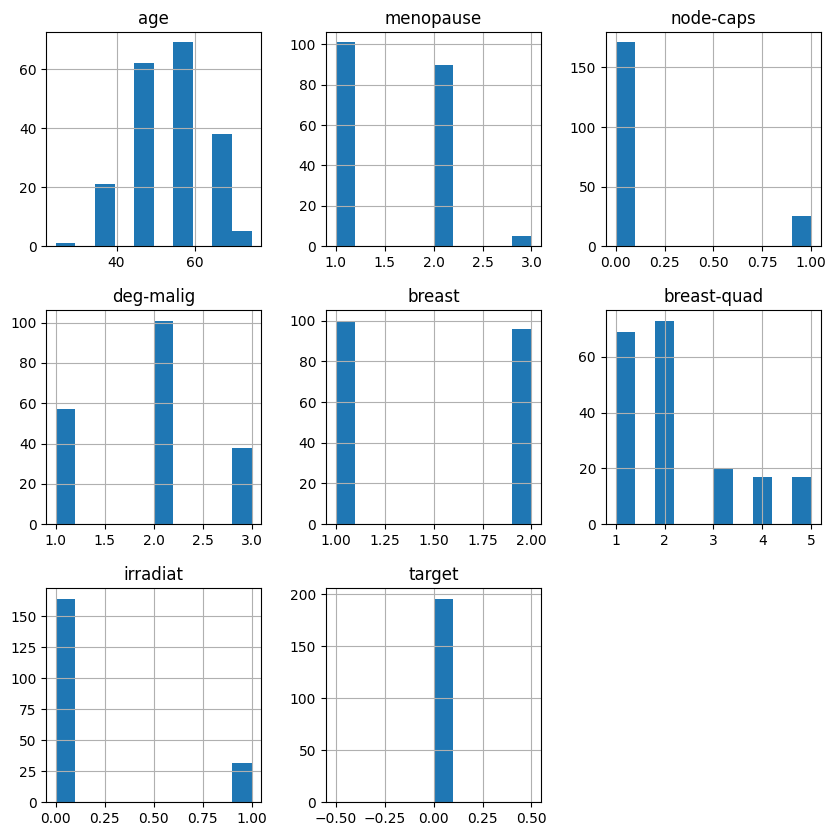

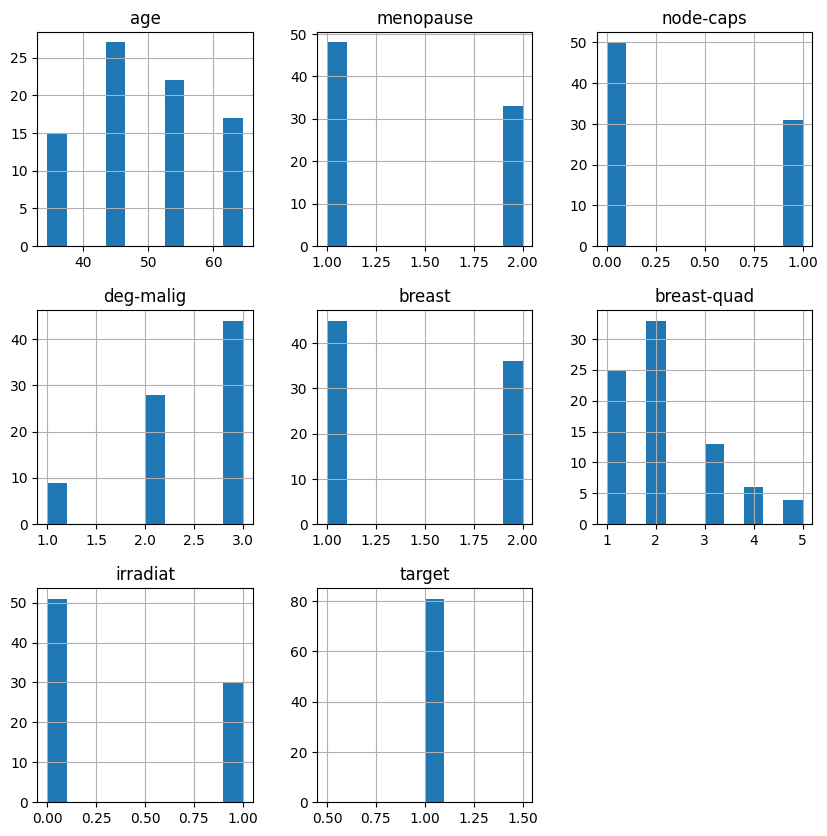

In [ ]:
clean_df.groupby('target').hist(figsize=(10, 10))

# Train Test Split and Oversampling

In [ ]:
#Use Cancer Characteristics & other gynechological details to predict the possibility of Breast Cancer Recurrence in Women.

features_list = ['age','menopause','tumor-size','inv-nodes','node-caps','deg-malig']
X = clean_df[features_list]
y = clean_df['target']

#y.dtype
print(X.head())
print(y.head())

    age  menopause tumor-size inv-nodes  node-caps  deg-malig
0  34.5          1         32         1          0          3
1  44.5          1         22         1          0          2
2  44.5          1         22         1          0          2
3  64.5          2         17         1          0          2
4  44.5          1          2         1          0          2
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


**Splitting Testing and Training Data**

In [ ]:
X = pd.get_dummies(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 23)

In [ ]:
print("Number instances in X_train dataset: ", X_train.shape)
print("Number instances in y_train dataset: ", y_train.shape)
print("Number instances in X_test dataset: ", X_test.shape)
print("Number instances in y_test dataset: ", y_test.shape)

Number instances in X_train dataset:  (185, 22)
Number instances in y_train dataset:  (185,)
Number instances in X_test dataset:  (92, 22)
Number instances in y_test dataset:  (92,)


**SMOTE Technique to address Data Imbalance**

In [ ]:
print("Before OverSampling, counts of Recurrent Class '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of No-Recurrent Class '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of Recurrent Class '1': 61
Before OverSampling, counts of No-Recurrent Class '0': 124 



In [ ]:
print(X_train.dtypes)

age                  float64
menopause              int64
node-caps              int64
deg-malig              int64
tumor-size_2            bool
tumor-size_17           bool
tumor-size_22           bool
tumor-size_27           bool
tumor-size_32           bool
tumor-size_37           bool
tumor-size_42           bool
tumor-size_47           bool
tumor-size_52           bool
tumor-size_14-Oct       bool
tumor-size_9-May        bool
inv-nodes_1             bool
inv-nodes_16            bool
inv-nodes_25            bool
inv-nodes_11-Sep        bool
inv-nodes_14-Dec        bool
inv-nodes_5-Mar         bool
inv-nodes_8-Jun         bool
dtype: object


**Resampling using SMOTE**

In [ ]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train,y_train)

In [ ]:
print('After OverSampling, the shape of features_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of Output_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of Recurrent Class '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of Non-Recurrent Class '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of features_X: (248, 22)
After OverSampling, the shape of Output_y: (248,) 

After OverSampling, counts of Recurrent Class '1': 124
After OverSampling, counts of Non-Recurrent Class '0': 124


In [ ]:
# Check features of the training and testing sets.

# type(X_train)
# X_train.dtypes
# type(X_test)
# type(y_train)
# y_train.dtype
# type(y_test)
# X_train.describe()
# y_train.describe()

# Classification

In [ ]:
#Trying Different Types of Classifiers
accuracy_scores = {}
#1.Decision Tree Classifier
recurrence_classifier = DecisionTreeClassifier(max_leaf_nodes=19, random_state=0)
recurrence_classifier.fit(X_train_res, y_train_res)
ModelPredictions = recurrence_classifier.predict(X_test)
accuracy_scores['Decision Tree'] = accuracy_score(y_true = y_test, y_pred = ModelPredictions)
accuracy_scores['Decision Tree']

0.6304347826086957

In [ ]:
#2.Logistic Regression
recurrence_classifier = LogisticRegression(random_state = 2)
recurrence_classifier.fit(X_train_res, y_train_res)
ModelPredictions = recurrence_classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
accuracy_scores['Logistic Regression'] = accuracy_score(y_true = y_test, y_pred = ModelPredictions)
accuracy_scores['Logistic Regression']

0.717391304347826

In [ ]:
#3.K-Nearest Neighbours
recurrence_classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
recurrence_classifier.fit(X_train_res, y_train_res)
ModelPredictions = recurrence_classifier.predict(X_test)
accuracy_scores['K-Nearest Neighbors'] = accuracy_score(y_true = y_test, y_pred = ModelPredictions)
accuracy_scores['K-Nearest Neighbors']

0.6739130434782609

In [ ]:
#4.Support Vector Classification
recurrence_classifier = SVC(kernel = 'linear', random_state = 0)
recurrence_classifier.fit(X_train_res, y_train_res)
ModelPredictions = recurrence_classifier.predict(X_test)
accuracy_scores['Support Vector Classification'] = accuracy_score(y_true = y_test, y_pred = ModelPredictions)
accuracy_scores['Support Vector Classification']

0.6956521739130435

In [ ]:
#5.Random Forest Algorithm
recurrence_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
recurrence_classifier.fit(X_train_res, y_train_res)
ModelPredictions = recurrence_classifier.predict(X_test)
accuracy_scores['Random Forest'] = accuracy_score(y_true = y_test, y_pred = ModelPredictions)
accuracy_scores['Random Forest']

0.6630434782608695

In [ ]:
#6.XGBoost Classification
recurrence_classifier = XGBClassifier()
recurrence_classifier.fit(X_train_res, y_train_res)
ModelPredictions = recurrence_classifier.predict(X_test)
accuracy_scores['XGBoost'] = accuracy_score(y_true = y_test, y_pred = ModelPredictions)
accuracy_scores['XGBoost']

0.6195652173913043

In [ ]:
#Model Accuracy per different Algorithms:

for model, accuracy in accuracy_scores.items():
    print(f"{model}: {accuracy:.2f}")


Decision Tree: 0.63
Logistic Regression: 0.72
K-Nearest Neighbors: 0.67
Support Vector Classification: 0.70
Random Forest: 0.66
XGBoost: 0.62


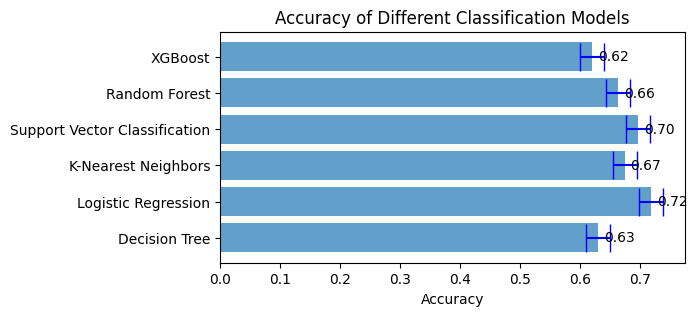

In [ ]:
# Plot the accuracy scores
fig, ax = plt.subplots(figsize=(6, 3))

# Creating the bar plot with error bars
models = list(accuracy_scores.keys())
accuracies = list(accuracy_scores.values())

ax.barh(models, accuracies, xerr=[0.02]*len(models), align='center', alpha=0.7, ecolor='blue', capsize=10)
ax.set_xlabel('Accuracy')
ax.set_title('Accuracy of Different Classification Models')

# Adding data labels
for i in range(len(models)):
    ax.text(accuracies[i] + 0.01, i, f'{accuracies[i]:.2f}', va='center')

# Show plot
plt.show()


In [ ]:
#2.Logistic Regression
recurrence_classifier = LogisticRegression(random_state = 2)
recurrence_classifier.fit(X_train_res, y_train_res)
ModelPredictions = recurrence_classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(accuracy_score(y_true = y_test, y_pred = ModelPredictions))
print("----------------------------------------------------------------")

print(confusion_matrix(y_true = y_test, y_pred = ModelPredictions))
print("----------------------------------------------------------------")

print(classification_report(y_true = y_test, y_pred = ModelPredictions))

0.717391304347826
----------------------------------------------------------------
[[55 17]
 [ 9 11]]
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.76      0.81        72
           1       0.39      0.55      0.46        20

    accuracy                           0.72        92
   macro avg       0.63      0.66      0.63        92
weighted avg       0.76      0.72      0.73        92

